In [21]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 1. Input Image (Grayscale-example)
# ---------------------------------------------------
img = np.array([
    [1, 2, 0, 3, 1],
    [4, 1, 0, 1, 2],
    [1, 3, 2, 2, 0],
    [0, 1, 3, 1, 1],
    [2, 2, 1, 0, 0]
], dtype=np.float32)

# ---------------------------------------------------
# 2. Convolution Kernel (Filter)
# ---------------------------------------------------
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
], dtype=np.float32)

# ---------------------------------------------------
# 3. Convolution Operation
# ---------------------------------------------------
def convolution2d(image, kernel, stride=1, padding=0):

    # Add padding
    if padding > 0:
        image = np.pad(
            image,
            ((padding, padding), (padding, padding)),
            mode='constant'
        )

    k_h, k_w = kernel.shape
    i_h, i_w = image.shape

    # Output dimensions
    out_h = (i_h - k_h) // stride + 1
    out_w = (i_w - k_w) // stride + 1

    output = np.zeros((out_h, out_w))

    # Slide kernel
    for y in range(0, out_h):
        for x in range(0, out_w):
            region = image[
                y*stride : y*stride + k_h,
                x*stride : x*stride + k_w
            ]
            output[y, x] = np.sum(region * kernel)

    return output

conv_out = convolution2d(img, kernel)

print("Convolution Output:\n", conv_out)


Convolution Output:
 [[ 4.  0. -1.]
 [ 0.  1.  2.]
 [-3.  3.  5.]]


In [24]:
def relu(map):
    return np.maximum(0,map)
relu_out = relu(conv_out)
print(relu_out)

[[4. 0. 0.]
 [0. 1. 2.]
 [0. 3. 5.]]


In [26]:
def max_pooling(feature_map, size=2, stride=2):

    h, w = feature_map.shape

    out_h = (h - size) // stride + 1
    out_w = (w - size) // stride + 1

    pooled = np.zeros((out_h, out_w))

    for y in range(out_h):
        for x in range(out_w):
            region = feature_map[
                y*stride : y*stride + 1,
                x*stride : x*stride + 1
            ]
            pooled[y, x] = np.max(region)

    return pooled

pool_out = max_pooling(relu_out)

print("\nMax Pool Output:\n", pool_out)



Max Pool Output:
 [[4.]]


Input Image:
 [[1. 2. 0. 3. 1.]
 [4. 1. 0. 1. 2.]
 [1. 3. 2. 2. 0.]
 [0. 1. 3. 1. 1.]
 [2. 2. 1. 0. 0.]]
Input Shape: (5, 5)

Kernel:
 [[ 1.  0. -1.]
 [ 1.  0. -1.]
 [ 1.  0. -1.]]

Convolution Output:
 [[ 4.  0. -1.]
 [ 0.  1.  2.]
 [-3.  3.  5.]]
Conv Shape: (3, 3)

ReLU Output:
 [[4. 0. 0.]
 [0. 1. 2.]
 [0. 3. 5.]]
ReLU Shape: (3, 3)

Max Pool Output:
 [[4. 0.]
 [0. 5.]]
Pool Shape: (2, 2)


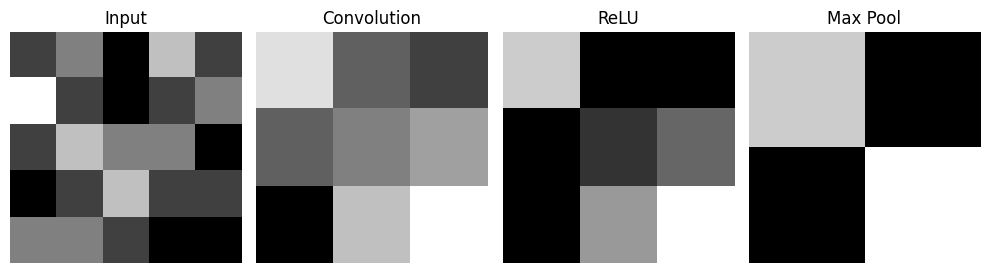

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 1️⃣ Input Image (Grayscale Example)
# ---------------------------------------------------
img = np.array([
    [1, 2, 0, 3, 1],
    [4, 1, 0, 1, 2],
    [1, 3, 2, 2, 0],
    [0, 1, 3, 1, 1],
    [2, 2, 1, 0, 0]
], dtype=np.float32)

print("Input Image:\n", img)
print("Input Shape:", img.shape)

# ---------------------------------------------------
# 2️⃣ Convolution Kernel (Vertical Edge Detector)
# ---------------------------------------------------
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
], dtype=np.float32)

print("\nKernel:\n", kernel)

# ---------------------------------------------------
# 3️⃣ Convolution Function
# ---------------------------------------------------
def convolution2d(image, kernel, stride=1, padding=0):

    # Add padding if needed
    if padding > 0:
        image = np.pad(
            image,
            ((padding, padding), (padding, padding)),
            mode='constant'
        )

    k_h, k_w = kernel.shape
    i_h, i_w = image.shape

    # Output dimensions
    out_h = (i_h - k_h) // stride + 1
    out_w = (i_w - k_w) // stride + 1

    output = np.zeros((out_h, out_w))

    # Slide kernel
    for y in range(out_h):
        for x in range(out_w):

            region = image[
                y*stride : y*stride + k_h,
                x*stride : x*stride + k_w
            ]

            output[y, x] = np.sum(region * kernel)

    return output

# Run convolution
conv_out = convolution2d(img, kernel)

print("\nConvolution Output:\n", conv_out)
print("Conv Shape:", conv_out.shape)

# ---------------------------------------------------
# 4️⃣ ReLU Activation
# ---------------------------------------------------
def relu(feature_map):
    return np.maximum(0, feature_map)

relu_out = relu(conv_out)

print("\nReLU Output:\n", relu_out)
print("ReLU Shape:", relu_out.shape)

# ---------------------------------------------------
# 5️⃣ Max Pooling Function
# ---------------------------------------------------
def max_pooling(feature_map, size=1, stride=2):

    h, w = feature_map.shape

    out_h = (h - size) // stride + 1
    out_w = (w - size) // stride + 1

    pooled = np.zeros((out_h, out_w))

    for y in range(out_h):
        for x in range(out_w):

            region = feature_map[
                y*stride : y*stride + size,
                x*stride : x*stride + size
            ]

            pooled[y, x] = np.max(region)

    return pooled

pool_out = max_pooling(relu_out)

print("\nMax Pool Output:\n", pool_out)
print("Pool Shape:", pool_out.shape)

# ---------------------------------------------------
# 6️⃣ Visualization
# ---------------------------------------------------
plt.figure(figsize=(10,3))

plt.subplot(1,4,1)
plt.imshow(img, cmap='gray')
plt.title("Input")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(conv_out, cmap='gray')
plt.title("Convolution")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(relu_out, cmap='gray')
plt.title("ReLU")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(pool_out, cmap='gray')
plt.title("Max Pool")
plt.axis("off")

plt.tight_layout()
plt.show()
